In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 
import numpy_financial as npf
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
from scipy.stats import spearmanr


In [3]:
df= pd.read_csv('downloads/ProsperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df1 = df[['BorrowerRate','EstimatedReturn','ProsperRating (numeric)','ListingCategory (numeric)',' IsBorrowerHomeowner','CreditScoreRangeLower',
         'OpenCreditLines','InquiriesLast6Months','PublicRecordsLast12Months','BankcardUtilization','DebtToIncomeRatio','StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationDate','LoanStatus']]

In [5]:
import datetime

In [6]:
df1['Datetime']= pd.to_datetime(df1['LoanOriginationDate'])


C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_6264/199776526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Datetime']= pd.to_datetime(df1['LoanOriginationDate'])


In [7]:
cutoff_date ='2009-12-31'
df1= df1.loc[df1['Datetime'] >= cutoff_date]

In [8]:
df1= df1.drop(['Datetime'],axis=1)


In [9]:
df1['LoanOriginationDate']

1           3/3/2014 0:00
3          11/1/2012 0:00
4          9/20/2013 0:00
5         12/24/2013 0:00
6          4/18/2013 0:00
               ...       
113932     4/22/2013 0:00
113933     11/7/2011 0:00
113934    12/23/2013 0:00
113935    11/21/2011 0:00
113936     1/21/2014 0:00
Name: LoanOriginationDate, Length: 83024, dtype: object

In [10]:
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Current')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Past Due (1-15 days)')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Past Due (16-30 days)')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Past Due (61-90 days)')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Past Due (31-60 days)')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Past Due (91-120 days)')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Past Due (>120 days)')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'FinalPaymentInProgress')], inplace=True)


In [11]:
df1.index[np.where(df1['LoanOriginationDate']=='2012-04-19 00:00:00')]

Int64Index([], dtype='int64')

In [12]:
df1=df1.dropna(subset=['EstimatedReturn', 'DebtToIncomeRatio', 'ProsperRating (numeric)'])

In [13]:
df1.columns


Index(['BorrowerRate', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ListingCategory (numeric)', ' IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'OpenCreditLines', 'InquiriesLast6Months',
       'PublicRecordsLast12Months', 'BankcardUtilization', 'DebtToIncomeRatio',
       'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate',
       'LoanStatus'],
      dtype='object')

In [14]:
correlation_matrix = df1.corr(method='spearman')


In [15]:
correlation_matrix

,BorrowerRate,EstimatedReturn,ProsperRating (numeric),ListingCategory (numeric),IsBorrowerHomeowner,CreditScoreRangeLower,OpenCreditLines,InquiriesLast6Months,PublicRecordsLast12Months,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount
BorrowerRate,1.000000,0.803052,-0.949105,0.022596,-0.072842,-0.562523,-0.071473,0.290536,0.041726,0.310394,0.246873,-0.225836,-0.277728
EstimatedReturn,0.803052,1.000000,-0.641568,0.000714,-0.058546,-0.428426,-0.058554,0.175407,0.036701,0.249317,0.194264,-0.176469,-0.064896
ProsperRating (numeric),-0.949105,-0.641568,1.000000,-0.031544,0.084883,0.594665,0.065980,-0.308888,-0.040130,-0.323398,-0.261189,0.232813,0.360201
ListingCategory (numeric),0.022596,0.000714,-0.031544,1.000000,-0.055961,0.007886,-0.171117,0.035017,0.025247,-0.110517,-0.138749,-0.043689,-0.200150
IsBorrowerHomeowner,-0.072842,-0.058546,0.084883,-0.055961,1.000000,0.268686,0.315051,0.021975,-0.014251,0.138850,0.032531,0.318614,0.118856
CreditScoreRangeLower,-0.562523,-0.428426,0.594665,0.007886,0.268686,1.000000,0.094023,-0.110767,-0.053842,-0.434528,-0.091753,0.163236,0.306675
OpenCreditLines,-0.071473,-0.058554,0.065980,-0.171117,0.315051,0.094023,1.000000,0.062760,-0.077921,0.178479,0.429445,0.302880,0.170726
InquiriesLast6Months,0.290536,0.175407,-0.308888,0.035017,0.021975,-0.110767,0.062760,1.000000,0.002569,-0.073415,-0.060760,0.092347,-0.098400
PublicRecordsLast12Months,0.041726,0.036701,-0.040130,0.025247,-0.014251,-0.053842,-0.077921,0.002569,1.000000,-0.035920,-0.055030,-0.024382,-0.036026
BankcardUtilization,0.310394,0.249317,-0.323398,-0.110517,0.138850,-0.434528,0.178479,-0.073415,-0.035920,1.000000,0.217414,0.108418,-0.094529


<AxesSubplot:>

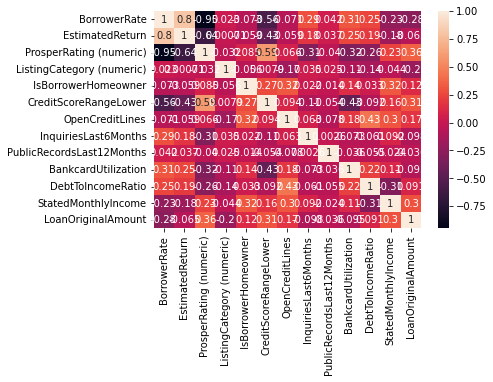

In [16]:
sb.heatmap(correlation_matrix, annot=True)

In [17]:
correlation_with_a = correlation_matrix['EstimatedReturn']


In [18]:
correlation_with_a

BorrowerRate                 0.803052
EstimatedReturn              1.000000
ProsperRating (numeric)     -0.641568
ListingCategory (numeric)    0.000714
 IsBorrowerHomeowner        -0.058546
CreditScoreRangeLower       -0.428426
OpenCreditLines             -0.058554
InquiriesLast6Months         0.175407
PublicRecordsLast12Months    0.036701
BankcardUtilization          0.249317
DebtToIncomeRatio            0.194264
StatedMonthlyIncome         -0.176469
LoanOriginalAmount          -0.064896
Name: EstimatedReturn, dtype: float64

In [19]:
sorted_variables = correlation_with_a.abs().sort_values(ascending=False)


In [20]:
ranked_data = pd.DataFrame()
for col in sorted_variables.index:
    ranked_data[col] = df[col].rank()

In [21]:
ranked_data

,EstimatedReturn,BorrowerRate,ProsperRating (numeric),CreditScoreRangeLower,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,InquiriesLast6Months,LoanOriginalAmount,OpenCreditLines,IsBorrowerHomeowner,PublicRecordsLast12Months,ListingCategory (numeric)
0,NaN,43031.5,NaN,20639.0,3391.5,35353.5,26597.5,96907.0,70764.0,13232.0,85198.5,52471.0,8483.0
1,5117.5,8925.0,72206.0,51350.5,19443.5,39266.5,77342.5,96907.0,77407.5,89768.0,28230.0,52471.0,78990.0
2,NaN,94058.0,NaN,489.5,NaN,5082.0,10685.5,25003.0,23724.5,NaN,28230.0,NaN,8483.0
3,8093.0,10949.5,72206.0,109809.5,9056.0,28382.5,22075.0,25003.0,77407.5,20353.5,85198.5,52471.0,111309.5
4,41644.0,69182.0,23867.5,51350.5,76193.5,65361.0,102033.0,64316.0,96790.0,101593.0,85198.5,52471.0,78990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,44559.5,58353.0,40177.0,67332.0,75038.5,21496.0,50846.0,25003.0,77407.5,57613.5,85198.5,52471.0,46119.5
113933,29222.0,17979.5,72206.0,67332.0,62935.5,15677.5,94779.0,64316.0,9507.0,85308.0,85198.5,52471.0,100865.5
113934,35519.5,72285.0,23867.5,67332.0,67369.5,100337.0,22075.0,64316.0,77407.5,79919.5,85198.5,52471.0,46119.5
113935,83658.5,89009.0,40177.0,51350.5,62935.5,98939.5,41611.0,64316.0,96790.0,73542.5,85198.5,52471.0,78990.0


In [22]:
print("Original DataFrame:")
print(df)

print("\nRanked DataFrame based on Spearman's correlation with variable 'A':")
print(ranked_data)

Original DataFrame:
                     ListingKey  ListingNumber ListingCreationDate  \
0       1021339766868145413AB3B         193129             09:29.3   
1       10273602499503308B223C1        1209647             28:07.9   
2       0EE9337825851032864889A          81716             00:47.1   
3       0EF5356002482715299901A         658116             02:35.0   
4       0F023589499656230C5E3E2         909464             38:39.1   
...                         ...            ...                 ...   
113932  E6D9357655724827169606C         753087             55:02.7   
113933  E6DB353036033497292EE43         537216             42:55.3   
113934  E6E13596170052029692BB1        1069178             49:12.7   
113935  E6EB3531504622671970D9E         539056             18:26.6   
113936  E6ED3600409833199F711B7        1140093             27:37.7   

       CreditGrade  Term              LoanStatus       ClosedDate  \
0                C    36               Completed   8/14/2009 0:00   
1

In [23]:
rankedirr=ranked_data['EstimatedReturn']

In [24]:
rankedinterest= ranked_data['BorrowerRate']

In [25]:
df1.insert( 15,'r_IRR', rankedirr, True)

In [26]:
df1.insert( 16,'r_interes trate',rankedinterest , True)

In [19]:
label = []

for i in range(len(df1)):
    if df1.iloc[i][' IsBorrowerHomeowner'] == True :
        label.append(1)
    else:
        label.append(0) 

In [20]:
df1.insert(12, 'Home', label , True)

In [21]:
df1=df1.drop([' IsBorrowerHomeowner'], axis=1)

In [22]:
labels = []

for i in range(len(df1)):
    if df1.iloc[i]['LoanStatus'] == 'Completed' :
        labels.append(1)
    else:
        labels.append(0)

In [23]:
df1.insert(12, 'Loanstatu', labels , True)

In [24]:
df1=df1.drop(['LoanStatus'], axis=1)

In [25]:
from sklearn.utils import shuffle

In [26]:
df2 = shuffle(df1)

In [27]:
df2

,BorrowerRate,EstimatedReturn,ProsperRating (numeric),ListingCategory (numeric),CreditScoreRangeLower,OpenCreditLines,InquiriesLast6Months,PublicRecordsLast12Months,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,Home,Loanstatu,LoanOriginalAmount,LoanOriginationDate
43218,7120.0,7820.0,4.0,1,680.0,7.0,0.0,0.0,0.55,0.17,4004.000000,0,1,1000,5/4/2010 0:00
76775,9405.0,16549.0,5.0,1,740.0,14.0,2.0,0.0,0.13,0.11,8333.333333,1,1,14000,7/25/2012 0:00
7497,3218.5,4171.5,6.0,1,720.0,7.0,0.0,0.0,0.95,0.22,6083.333333,1,1,13000,9/28/2012 0:00
110300,4981.0,6200.0,5.0,2,680.0,10.0,0.0,0.0,0.66,0.23,5000.000000,1,1,6000,8/21/2012 0:00
7815,10698.5,8867.0,3.0,2,720.0,12.0,0.0,0.0,0.81,0.14,8833.333333,1,1,4000,5/16/2013 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66224,19599.5,18871.0,2.0,1,660.0,4.0,1.0,0.0,0.00,0.11,6000.000000,1,1,5000,5/13/2011 0:00
67767,2757.5,4380.5,6.0,1,780.0,5.0,0.0,0.0,0.01,0.13,5416.666667,0,1,10000,5/20/2010 0:00
44581,15183.5,19446.5,3.0,3,720.0,17.0,1.0,0.0,0.76,0.30,10416.666670,1,1,10000,10/5/2010 0:00
1285,1873.5,2909.0,6.0,1,740.0,6.0,0.0,0.0,0.34,0.28,1761.333333,0,1,4200,6/4/2010 0:00


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x= df2[['BorrowerRate','ProsperRating (numeric)',
       'ListingCategory (numeric)', 'CreditScoreRangeLower', 'OpenCreditLines',
       'InquiriesLast6Months', 'PublicRecordsLast12Months',
       'BankcardUtilization', 'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'Home','LoanOriginalAmount']]

In [30]:
y= df2['EstimatedReturn']

In [31]:
x_train, x_test , y_train, y_test = train_test_split(x, y , train_size=.7)

In [32]:
from sklearn import linear_model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model1= LinearRegression().fit(x_train, y_train)

In [35]:
pred1= model1.predict(x_test)
pred1

array([ 7769.05211452, 15023.72839389,  9984.86161787, ...,
        4941.35564159, 16612.16877211,  9542.82048049])

In [36]:
score= model1.score(x_test, y_test)
score

0.7679169524320922

In [37]:
model1.coef_  

array([ 1.80297392e+00,  3.72601939e+03,  7.50034047e+00, -1.17585511e+01,
        5.29041220e+00, -1.27855585e+02,  2.99704443e+02,  2.73500399e+02,
        4.81306707e+01, -1.93334046e-02, -6.89654834e+01,  7.73145624e-02])

In [38]:
x2=df2[['r_interes trate','ProsperRating (numeric)','CreditScoreRangeLower']]

KeyError: "['r_interes trate'] not in index"

In [47]:
y2= df2['r_IRR']

In [48]:
x2_train, x2_test , y2_train, y2_test = train_test_split(x2, y2, train_size=.7) 

In [49]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [50]:
model2= LinearRegression().fit(x2_train, y2_train)
pred2= model2.predict(x2_test)
pred2

array([62652.30883576, 87096.25627064, 71632.25225556, ...,
       84132.69656776, 76172.52159895, 31887.53905853])

In [51]:
score2= model2.score(x2_test, y2_test)
score2

0.8805422628178524

In [52]:
model2.coef_

array([ 1.49845344e+00,  1.79304715e+04, -1.48162874e+01])

In [53]:
x3= df2[['ListingCategory (numeric)', 'LoanOriginalAmount','r_interes trate']]

In [54]:
y3=df2['r_IRR']

In [55]:
x3_train, x3_test , y3_train, y3_test = train_test_split(x3, y3, train_size=.7)

In [56]:
model3= LinearRegression().fit(x3_train, y3_train)
pred3= model3.predict(x3_test)
pred3

array([50105.04583353, 69531.67191619, 79175.74361715, ...,
       72518.37714241, 52518.71674624, 76320.20499608])

In [57]:
score3= model3.score(x3_test, y3_test)
score3

0.7615244022952953

In [58]:
model3.coef_

array([-24.79648954,   0.80105969,   0.69348234])

In [59]:
x4= df2[['Home','StatedMonthlyIncome','r_interes trate']]

In [60]:
y4= df2['r_IRR']

In [61]:
x4_train, x4_test , y4_train, y4_test = train_test_split(x4, y4, train_size=.7)

In [62]:
model4= LinearRegression().fit(x4_train, y4_train)
pred4= model4.predict(x4_test)
pred4

array([79859.82046544, 11111.00679135, 55117.98691762, ...,
       38348.34570376, 69123.72641667, 37308.19349987])

In [63]:
score4= model4.score(x4_test, y4_test)
score4

0.730704048004766

In [64]:
model4.coef_

array([1.64403250e+02, 1.94799693e-02, 6.62791368e-01])

In [65]:
x5= df2[['InquiriesLast6Months', 'PublicRecordsLast12Months','OpenCreditLines','BankcardUtilization','r_interes trate']]

In [66]:
y5= df2['r_IRR']

In [67]:
x5_train, x5_test , y5_train, y5_test = train_test_split(x5, y5, train_size=.7)

In [68]:
model5= LinearRegression().fit(x5_train, y5_train)
pred5= model5.predict(x5_test)
pred5

array([72405.4824177 , 82307.1575894 , 71327.52600167, ...,
        8718.36577154, 59994.03948739, 78586.72906212])

In [69]:
score5= model5.score(x5_test, y5_test)
score5

0.7553093346866264

In [70]:
model5.coef_

array([-1.35204819e+03, -1.92551720e+03,  9.23593087e+01, -2.38244087e+03,
        6.86302911e-01])

In [71]:
x6= df2[['ProsperRating (numeric)',
       'ListingCategory (numeric)', 'CreditScoreRangeLower', 'OpenCreditLines',
       'InquiriesLast6Months', 'PublicRecordsLast12Months',
       'BankcardUtilization', 'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'Home', 'LoanOriginalAmount','r_interes trate']]

In [72]:
y6= df2['r_IRR']

In [73]:
x6_train, x6_test , y6_train, y6_test = train_test_split(x6, y6, train_size=.7)

In [74]:
model6= LinearRegression().fit(x6_train, y6_train)
pred6= model6.predict(x6_test)
pred6

array([15848.00185609, 72220.56926012, 58145.37453236, ...,
         325.22489052, 60602.30055091, 71084.2453268 ])

In [75]:
score6= model6.score(x6_test, y6_test)
score6

0.8904126688477307

In [76]:
model6.coef_

array([ 1.78464704e+04, -1.64573920e+01, -1.25330135e+01,  3.84374937e+01,
       -2.79647100e+02,  1.40414437e+02,  2.47564798e+02,  9.75541978e+01,
       -3.61442959e-02, -1.86490372e+02,  3.94877007e-02,  1.49921031e+00])

In [77]:
 from lazypredict.Supervised import LazyClassifier 


In [78]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 
import numpy_financial as npf
from sklearn.metrics import confusion_matrix, accuracy_score
import klib

In [79]:
clf= LazyClassifier (verbose=0, ignore_warnings=True,custom_metric=None)

In [80]:
models, predictions= clf.fit(x_train, x_test , y_train, y_test )

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 42.60it/s]


In [81]:
print(models)

Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: []


In [82]:
from lazypredict.Supervised import LazyRegressor


In [83]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(x_train, x_test, y_train, y_test)


 22%|██████████████████▏                                                                | 9/41 [00:07<00:45,  1.41s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 76%|██████████████████████████████████████████████████████████████                    | 31/41 [05:30<01:57, 11.78s/it]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 95%|██████████████████████████████████████████████████████████████████████████████    | 39/41 [05:39<00:04,  2.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 14916, number of used features: 12
[LightGBM] [Info] Start training from score 0.106770


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [05:40<00:00,  8.31s/it]


In [84]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.94       0.94  0.01        5.36
RandomForestRegressor                        0.94       0.94  0.01        8.41
BaggingRegressor                             0.93       0.93  0.01        0.71
LGBMRegressor                                0.93       0.93  0.01        0.66
HistGradientBoostingRegressor                0.93       0.93  0.01        1.68
XGBRegressor                                 0.93       0.93  0.01        0.59
GradientBoostingRegressor                    0.92       0.92  0.01        2.04
ExtraTreeRegressor                           0.88       0.88  0.01        0.11
NuSVR                                        0.88       0.88  0.01      132.13
DecisionTreeRegressor                        0.88       0.88  0.01        0.17
OrthogonalMatchingPursuitCV                  0.82   

In [86]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(x2_train, x2_test, y2_train, y2_test)


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [03:47<00:00,  5.54s/it]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 273
[LightGBM] [Info] Number of data points in the train set: 14916, number of used features: 3
[LightGBM] [Info] Start training from score 50704.285298


In [87]:
print(models)

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
RandomForestRegressor                        0.96       0.96  5767.24   
BaggingRegressor                             0.96       0.96  5770.44   
ExtraTreesRegressor                          0.95       0.95  5870.38   
DecisionTreeRegressor                        0.95       0.95  5994.16   
ExtraTreeRegressor                           0.95       0.95  6090.53   
LGBMRegressor                                0.95       0.95  6266.47   
XGBRegressor                                 0.95       0.95  6323.07   
HistGradientBoostingRegressor                0.94       0.94  6500.33   
KNeighborsRegressor                          0.94       0.94  6755.89   
GradientBoostingRegressor                    0.93       0.93  7244.09   
SGDRegressor                                 0.88       0.88  9543.85   
OrthogonalMatchingPursuitCV                  0.88  

In [88]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(x3_train, x3_test, y3_train, y3_test)


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [03:37<00:00,  5.30s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 498
[LightGBM] [Info] Number of data points in the train set: 14916, number of used features: 3
[LightGBM] [Info] Start training from score 50630.642498


In [89]:
print(models)

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
RandomForestRegressor                        0.88       0.88   9705.51   
BaggingRegressor                             0.87       0.87   9940.59   
ExtraTreesRegressor                          0.87       0.87  10108.75   
LGBMRegressor                                0.86       0.86  10366.03   
XGBRegressor                                 0.85       0.85  10806.03   
HistGradientBoostingRegressor                0.85       0.85  10825.15   
GradientBoostingRegressor                    0.83       0.83  11273.25   
DecisionTreeRegressor                        0.83       0.83  11411.03   
KNeighborsRegressor                          0.80       0.80  12387.45   
ExtraTreeRegressor                           0.80       0.80  12404.65   
LassoCV                                      0.76       0.76  13485.58   
Lasso                                 

In [90]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(x4_train, x4_test, y4_train, y4_test)


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [03:41<00:00,  5.40s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 14916, number of used features: 3
[LightGBM] [Info] Start training from score 50708.009218


In [91]:
print(models)

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
RandomForestRegressor                        0.85       0.85  10952.72   
BaggingRegressor                             0.84       0.84  11185.38   
LGBMRegressor                                0.83       0.83  11635.14   
ExtraTreesRegressor                          0.82       0.82  11911.67   
GradientBoostingRegressor                    0.81       0.81  12285.04   
HistGradientBoostingRegressor                0.81       0.81  12326.62   
XGBRegressor                                 0.80       0.80  12548.46   
DecisionTreeRegressor                        0.79       0.79  12678.12   
ExtraTreeRegressor                           0.77       0.77  13398.60   
KNeighborsRegressor                          0.75       0.75  14085.59   
AdaBoostRegressor                            0.74       0.74  14107.87   
Lars                                  

In [92]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(x5_train, x5_test, y5_train, y5_test)


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [03:45<00:00,  5.49s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 14916, number of used features: 5
[LightGBM] [Info] Start training from score 50759.719362


In [93]:
print(models)

                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
RandomForestRegressor                        0.87       0.87    9885.68   
BaggingRegressor                             0.86       0.86   10235.56   
ExtraTreesRegressor                          0.86       0.86   10456.29   
LGBMRegressor                                0.85       0.85   10844.63   
HistGradientBoostingRegressor                0.84       0.84   11264.35   
XGBRegressor                                 0.83       0.83   11569.34   
GradientBoostingRegressor                    0.83       0.83   11608.99   
DecisionTreeRegressor                        0.78       0.78   12910.86   
ExtraTreeRegressor                           0.77       0.77   13327.67   
SGDRegressor                                 0.76       0.76   13729.83   
OrthogonalMatchingPursuitCV                  0.76       0.76   13732.02   
LassoCV                  

In [94]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(x6_train, x6_test, y6_train, y6_test)


 98%|████████████████████████████████████████████████████████████████████████████████  | 40/41 [04:33<00:04,  4.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1088
[LightGBM] [Info] Number of data points in the train set: 14916, number of used features: 12
[LightGBM] [Info] Start training from score 50813.417572


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [04:33<00:00,  6.67s/it]


In [95]:
print(models)

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
RandomForestRegressor                        0.97       0.97  5135.86   
BaggingRegressor                             0.96       0.96  5251.82   
ExtraTreesRegressor                          0.96       0.96  5253.76   
LGBMRegressor                                0.96       0.96  5781.42   
XGBRegressor                                 0.95       0.95  5871.61   
HistGradientBoostingRegressor                0.95       0.95  6053.19   
DecisionTreeRegressor                        0.94       0.94  6541.13   
GradientBoostingRegressor                    0.94       0.94  6800.19   
ExtraTreeRegressor                           0.92       0.92  7696.07   
LarsCV                                       0.89       0.89  9129.73   
LassoLarsCV                                  0.89       0.89  9129.73   
Lasso                                        0.89  

In [18]:
df1.columns

Index(['BorrowerRate', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ListingCategory (numeric)', ' IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'OpenCreditLines', 'InquiriesLast6Months',
       'PublicRecordsLast12Months', 'BankcardUtilization', 'DebtToIncomeRatio',
       'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate',
       'LoanStatus'],
      dtype='object')

In [19]:
col_rank= ['BorrowerRate', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ListingCategory (numeric)', ' IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'OpenCreditLines', 'InquiriesLast6Months',
       'PublicRecordsLast12Months', 'BankcardUtilization', 'DebtToIncomeRatio',
       'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate',
       'LoanStatus']

In [22]:
df1[col_rank]=df1[col_rank].rank(axis=0)

In [23]:
df1.columns

Index(['BorrowerRate', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ListingCategory (numeric)', ' IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'OpenCreditLines', 'InquiriesLast6Months',
       'PublicRecordsLast12Months', 'BankcardUtilization', 'DebtToIncomeRatio',
       'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate',
       'LoanStatus'],
      dtype='object')

In [24]:
df1.head()

,BorrowerRate,EstimatedReturn,ProsperRating (numeric),ListingCategory (numeric),IsBorrowerHomeowner,CreditScoreRangeLower,OpenCreditLines,InquiriesLast6Months,PublicRecordsLast12Months,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanStatus
15,18403.5,13786.5,1422.5,19951.5,15654.5,11343.5,12766.5,4628.0,10547.0,19861.5,20069.0,12896.5,7999.0,10889.0,20905.0
23,11466.5,9130.5,8287.5,20523.5,4999.5,8371.5,9008.5,4628.0,10547.0,16363.0,18721.5,2565.0,1874.5,11428.0,20905.0
26,15477.5,14241.5,4366.5,5460.0,4999.5,5190.0,6983.5,16424.5,10547.0,6483.5,3749.0,7468.0,7999.0,7469.0,12375.5
27,1873.5,2909.0,18365.0,5460.0,15654.5,11343.5,19791.5,16424.5,10547.0,3102.0,14197.5,15548.5,7999.0,14986.5,12375.5
30,2612.5,1320.0,18365.0,21232.0,4999.5,16325.5,3331.5,4628.0,10547.0,3703.0,3749.0,6979.5,16887.0,8412.0,12375.5


In [16]:
columns_to_transform = ['EstimatedReturn', 'BorrowerRate']
df1[columns_to_transform] = df1[columns_to_transform].rank(axis=0)

In [17]:
df1.columns

Index(['BorrowerRate', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ListingCategory (numeric)', ' IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'OpenCreditLines', 'InquiriesLast6Months',
       'PublicRecordsLast12Months', 'BankcardUtilization', 'DebtToIncomeRatio',
       'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate',
       'LoanStatus'],
      dtype='object')

In [18]:
df1.head(5)

,BorrowerRate,EstimatedReturn,ProsperRating (numeric),ListingCategory (numeric),IsBorrowerHomeowner,CreditScoreRangeLower,OpenCreditLines,InquiriesLast6Months,PublicRecordsLast12Months,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanStatus
15,18403.5,13786.5,1.0,13,True,700.0,9.0,0.0,0.0,0.97,0.49,5500.000000,4000,4/19/2012 0:00,Defaulted
23,11466.5,9130.5,3.0,15,False,680.0,7.0,0.0,0.0,0.84,0.39,2500.000000,2000,4/26/2013 0:00,Defaulted
26,15477.5,14241.5,2.0,1,False,660.0,6.0,2.0,0.0,0.30,0.11,3885.916667,4000,2/21/2013 0:00,Completed
27,1873.5,2909.0,6.0,1,True,700.0,16.0,2.0,0.0,0.09,0.26,6666.666667,4000,6/24/2010 0:00,Completed
30,2612.5,1320.0,6.0,20,False,740.0,4.0,0.0,0.0,0.13,0.11,3750.000000,10000,2/7/2012 0:00,Completed


In [39]:
x2=df2[['BorrowerRate','ProsperRating (numeric)','CreditScoreRangeLower']]

In [40]:
y2=df2['EstimatedReturn']

In [41]:
x2_train, x2_test , y2_train, y2_test = train_test_split(x2, y2, train_size=.7) 

In [42]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [43]:
model2= LinearRegression().fit(x2_train, y2_train)
pred2= model2.predict(x2_test)
pred2

array([14992.93585139,  4343.92297884, 12833.17558605, ...,
        4854.2632306 , 14281.15526837, 15647.75635979])

In [44]:
model2.coef_

array([ 1.81487529e+00,  3.86138600e+03, -1.18630097e+01])